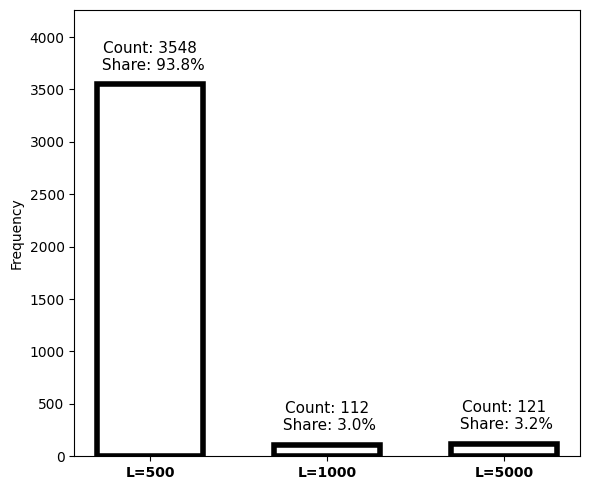

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Read and count occurrences of each L value
counts = Counter()
with open('../../data/training/state_action_pairs.jsonl', 'r') as f:
    for line in f:
        data = json.loads(line)
        counts[data['action']['optimal_L_value']] += 1

# Prepare data
class_values = [500, 1000, 5000]
labels = ['L=500', 'L=1000', 'L=5000']
counts_list = [counts.get(v, 0) for v in class_values]
total = sum(counts_list)

# Plot distribution with annotations
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(
    labels,
    counts_list,
    width=0.6,
    facecolor='white',
    edgecolor='black',
    linewidth=4
)

# 1) Bold the x-tick labels
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels, fontweight='bold')

# 2) Add extra headroom above the tallest bar
top_margin = 1.20  # 10% extra
ax.set_ylim(0, max(counts_list) * top_margin)

# Annotate each bar with count and percentage
offset = max(counts_list) * 0.03
for bar, count in zip(bars, counts_list):
    height = bar.get_height()
    pct = count / total * 100
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + offset,
        f'Count: {count}\n Share: {pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11
    )

ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()